## What are the most demanded skills for the top 3 most popular data roles?

Methodology

1. clean up skill column
2. calculate skill count based on job_title_short
3. calculate skill percentage
4. plot final findings


In [29]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States']

df_skills = df_US.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [3]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [4]:
type(df_skills_count)

pandas.core.series.Series

In [5]:
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [6]:
type(df_skills_count)

pandas.core.frame.DataFrame

In [7]:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count.head(10)

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
1522,sql,Data Engineer,23958
1208,python,Data Engineer,22762
1611,tableau,Data Analyst,19311
1207,python,Data Analyst,18382
123,aws,Data Engineer,15018


In [9]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

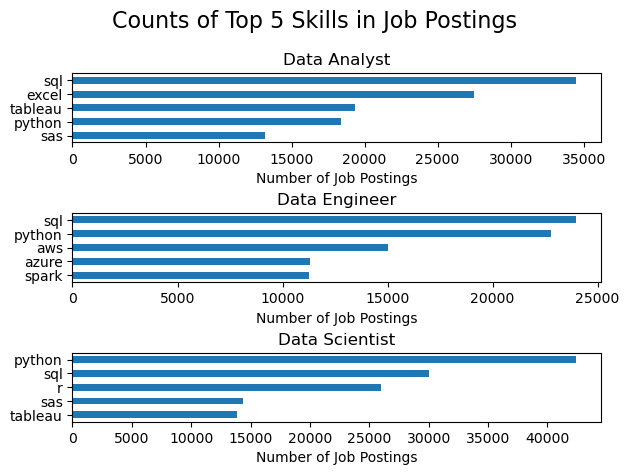

In [20]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlabel('Number of Job Postings')
fig.suptitle('Counts of Top 5 Skills in Job Postings', fontsize=16)
fig.tight_layout(h_pad=0.5)
plt.show()

In [22]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [24]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

In [26]:
df_skills_perc['skill_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


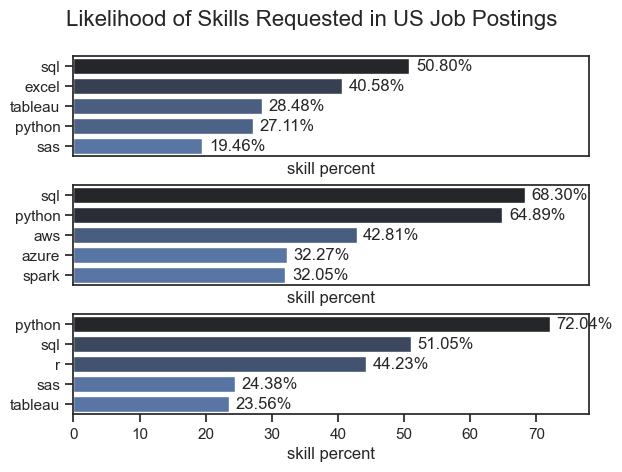

In [50]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style = "ticks")
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlabel('skill percent')
    ax[i].set_xbound(0, 78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.2f}%', va='center')

    if i != len(job_titles) -1:
        ax[i].set_xticks([])
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=16)
fig.tight_layout(h_pad=0.5)
plt.show()